In [1]:
# Importing required packages
import time

import matplotlib.pyplot as plt
import numpy as np

from keras import backend as K
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D, Conv2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.datasets import cifar10

% matplotlib inline
np.random.seed(2017) 

Using TensorFlow backend.


In [2]:
# Loading CIFAR Dataset
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

170500096/170498071 [==============================] - 4s 0us/step


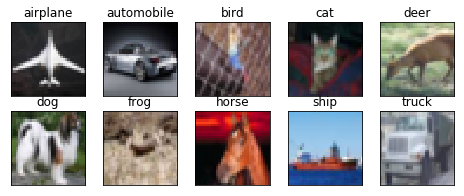

In [3]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

### Normal Convolution

In [0]:
# Define the model
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3))) # 30 - RF 3
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.05))

model.add(Conv2D(64, (3, 3))) # 28 - RF 5
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.05))

model.add(Conv2D(128, (3, 3))) # 26 - RF 7
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.05))

model.add(Conv2D(32, (1, 1))) # 26 - RF 7
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.05))

model.add(MaxPooling2D(pool_size=(2, 2))) # 13 - RF 8
model.add(Dropout(0.05))

model.add(Conv2D(64, (3, 3))) # 11 - RF 12
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.05))

model.add(Conv2D(96, (3, 3))) # 9 - RF 14
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.05))

model.add(Conv2D(128, (3, 3))) # 7 - RF 16
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.05))

model.add(Conv2D(32, (1, 1))) # 7 - RF 16
model.add(BatchNormalization())
model.add(Dropout(0.05))
model.add(Activation('relu'))

model.add(Conv2D(32, (7, 7))) # 1 - RF 28
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.05))

model.add(Conv2D(10, (1, 1))) # 1 - RF 28

model.add(Flatten())
model.add(Activation('softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [12]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
batch_normalization_10 (Batc (None, 30, 30, 32)        128       
_________________________________________________________________
activation_11 (Activation)   (None, 30, 30, 32)        0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 28, 28, 64)        18496     
_________________________________________________________________
activation_12 (Activation)   (None, 28, 28, 64)        0         
_________________________________________________________________
batch_normalization_11 (Batc (None, 28, 28, 64)        256       
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`
  if sys.path[0] == '':


Epoch 1/50
390/390 [==============================] - 23s 60ms/step - loss: 1.5059 - acc: 0.4602 - val_loss: 1.5507 - val_acc: 0.4662
Epoch 2/50
390/390 [==============================] - 21s 53ms/step - loss: 1.0327 - acc: 0.6345 - val_loss: 1.0641 - val_acc: 0.6339
Epoch 3/50
390/390 [==============================] - 21s 53ms/step - loss: 0.8445 - acc: 0.7035 - val_loss: 1.1306 - val_acc: 0.6123
Epoch 4/50
390/390 [==============================] - 21s 54ms/step - loss: 0.7271 - acc: 0.7455 - val_loss: 0.8855 - val_acc: 0.6908
Epoch 5/50
390/390 [==============================] - 21s 54ms/step - loss: 0.6483 - acc: 0.7748 - val_loss: 0.8023 - val_acc: 0.7212
Epoch 6/50
390/390 [==============================] - 21s 54ms/step - loss: 0.5879 - acc: 0.7959 - val_loss: 0.8094 - val_acc: 0.7234
Epoch 7/50
390/390 [==============================] - 21s 54ms/step - loss: 0.5387 - acc: 0.8146 - val_loss: 0.7548 - val_acc: 0.7505
Epoch 8/50
390/390 [==============================] - 21s 54ms

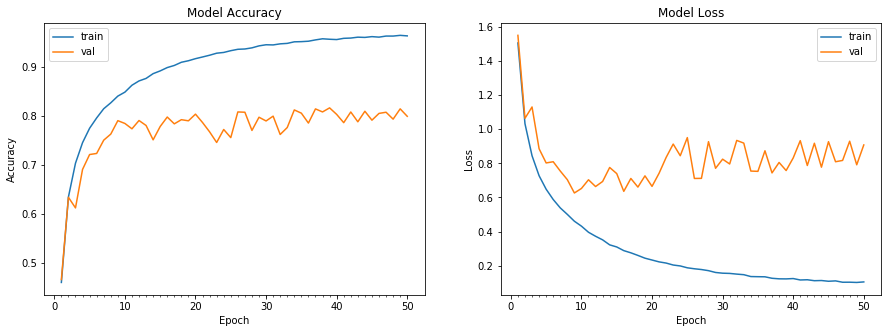

Accuracy on test data is: 79.92


In [13]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

### Spatially Separable Convolutions

In [0]:
# Define the model
model = Sequential()

model.add(Conv2D(32, (3, 1), input_shape=(32, 32, 3)))
model.add(Conv2D(32, (1, 3))) # 30 - RF 3
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.05))

model.add(Conv2D(64, (3, 1))) # 28 - RF 5
model.add(Conv2D(64, (1, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.05))

model.add(Conv2D(128, (3, 1))) # 26 - RF 7
model.add(Conv2D(128, (1, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.05))

model.add(Conv2D(32, (1, 1))) # 26 - RF 7
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.05))

model.add(MaxPooling2D(pool_size=(2, 2))) # 13 - RF 8
model.add(Dropout(0.05))

model.add(Conv2D(64, (3, 1))) # 11 - RF 12
model.add(Conv2D(64, (1, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.05))

model.add(Conv2D(96, (3, 1))) # 9 - RF 14
model.add(Conv2D(96, (1, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.05))

model.add(Conv2D(128, (3, 1))) # 7 - RF 16
model.add(Conv2D(128, (1, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.05))

model.add(Conv2D(32, (1, 1))) # 7 - RF 16
model.add(BatchNormalization())
model.add(Dropout(0.05))
model.add(Activation('relu'))

model.add(Conv2D(32, (7, 1))) # 1 - RF 28
model.add(Conv2D(32, (1, 7)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.05))

model.add(Conv2D(10, (1, 1))) # 1 - RF 28

model.add(Flatten())
model.add(Activation('softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_55 (Conv2D)           (None, 30, 32, 32)        320       
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 30, 30, 32)        3104      
_________________________________________________________________
batch_normalization_37 (Batc (None, 30, 30, 32)        128       
_________________________________________________________________
activation_41 (Activation)   (None, 30, 30, 32)        0         
_________________________________________________________________
dropout_41 (Dropout)         (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_57 (Conv2D)           (None, 28, 30, 64)        6208      
_________________________________________________________________
conv2d_58 (Conv2D)           (None, 28, 28, 64)        12352     
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`
  # Remove the CWD from sys.path while we load stuff.


Epoch 1/50
390/390 [==============================] - 28s 72ms/step - loss: 1.5753 - acc: 0.4287 - val_loss: 2.0240 - val_acc: 0.3938
Epoch 2/50
390/390 [==============================] - 24s 61ms/step - loss: 1.0993 - acc: 0.6092 - val_loss: 1.2950 - val_acc: 0.5588
Epoch 3/50
390/390 [==============================] - 24s 61ms/step - loss: 0.9130 - acc: 0.6765 - val_loss: 1.1321 - val_acc: 0.6071
Epoch 4/50
390/390 [==============================] - 24s 61ms/step - loss: 0.7979 - acc: 0.7193 - val_loss: 0.9675 - val_acc: 0.6682
Epoch 5/50
390/390 [==============================] - 24s 61ms/step - loss: 0.7286 - acc: 0.7466 - val_loss: 0.8244 - val_acc: 0.7191
Epoch 6/50
390/390 [==============================] - 24s 61ms/step - loss: 0.6748 - acc: 0.7658 - val_loss: 0.8492 - val_acc: 0.7073
Epoch 7/50
390/390 [==============================] - 24s 61ms/step - loss: 0.6226 - acc: 0.7867 - val_loss: 0.7390 - val_acc: 0.7491
Epoch 8/50
390/390 [==============================] - 24s 62ms

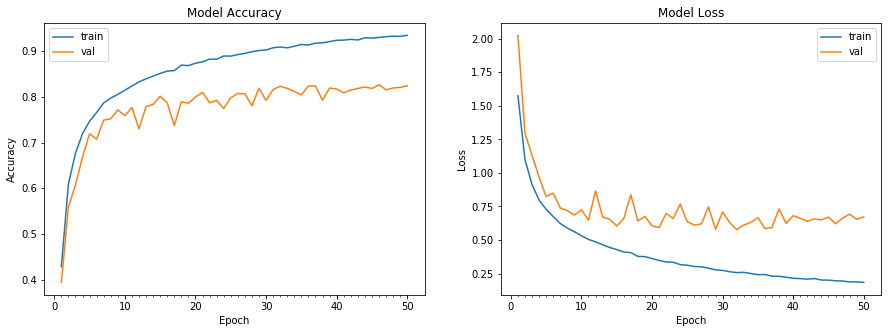

Accuracy on test data is: 82.41


In [18]:
datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

### Depthwise Separable Convolutions

In [0]:
from keras.layers.convolutional import SeparableConv2D

In [0]:
# Define the model
model = Sequential()

model.add(SeparableConv2D(32, (3, 3), input_shape=(32, 32, 3))) # 30 - RF 3
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.05))

model.add(SeparableConv2D(64, (3, 3))) # 28 - RF 5
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.05))

model.add(SeparableConv2D(128, (3, 3))) # 26 - RF 7
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.05))

model.add(SeparableConv2D(32, (1, 1))) # 26 - RF 7
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.05))

model.add(MaxPooling2D(pool_size=(2, 2))) # 13 - RF 8
model.add(Dropout(0.05))

model.add(SeparableConv2D(64, (3, 3))) # 11 - RF 12
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.05))

model.add(SeparableConv2D(96, (3, 3))) # 9 - RF 14
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.05))

model.add(SeparableConv2D(128, (3, 3))) # 7 - RF 16
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.05))

model.add(SeparableConv2D(32, (1, 1))) # 7 - RF 16
model.add(BatchNormalization())
model.add(Dropout(0.05))
model.add(Activation('relu'))

model.add(SeparableConv2D(32, (7, 7))) # 1 - RF 28
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.05))

model.add(SeparableConv2D(10, (1, 1))) # 1 - RF 28

model.add(Flatten())
model.add(Activation('softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [22]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv2d_1 (Separabl (None, 30, 30, 32)        155       
_________________________________________________________________
batch_normalization_46 (Batc (None, 30, 30, 32)        128       
_________________________________________________________________
activation_51 (Activation)   (None, 30, 30, 32)        0         
_________________________________________________________________
dropout_51 (Dropout)         (None, 30, 30, 32)        0         
_________________________________________________________________
separable_conv2d_2 (Separabl (None, 28, 28, 64)        2400      
_________________________________________________________________
activation_52 (Activation)   (None, 28, 28, 64)        0         
_________________________________________________________________
batch_normalization_47 (Batc (None, 28, 28, 64)        256       
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`
  # Remove the CWD from sys.path while we load stuff.


Epoch 1/50
390/390 [==============================] - 35s 89ms/step - loss: 1.7880 - acc: 0.3720 - val_loss: 1.9307 - val_acc: 0.3842
Epoch 2/50
390/390 [==============================] - 30s 77ms/step - loss: 1.1738 - acc: 0.5814 - val_loss: 1.0996 - val_acc: 0.6122
Epoch 3/50
390/390 [==============================] - 30s 77ms/step - loss: 1.0181 - acc: 0.6397 - val_loss: 1.0254 - val_acc: 0.6354
Epoch 4/50
390/390 [==============================] - 30s 78ms/step - loss: 0.9211 - acc: 0.6731 - val_loss: 0.9296 - val_acc: 0.6732
Epoch 5/50
390/390 [==============================] - 30s 77ms/step - loss: 0.8546 - acc: 0.6985 - val_loss: 0.9237 - val_acc: 0.6860
Epoch 6/50
390/390 [==============================] - 30s 77ms/step - loss: 0.8054 - acc: 0.7169 - val_loss: 0.8401 - val_acc: 0.7107
Epoch 7/50
390/390 [==============================] - 30s 77ms/step - loss: 0.7653 - acc: 0.7335 - val_loss: 0.8563 - val_acc: 0.7044
Epoch 8/50
390/390 [==============================] - 30s 78ms

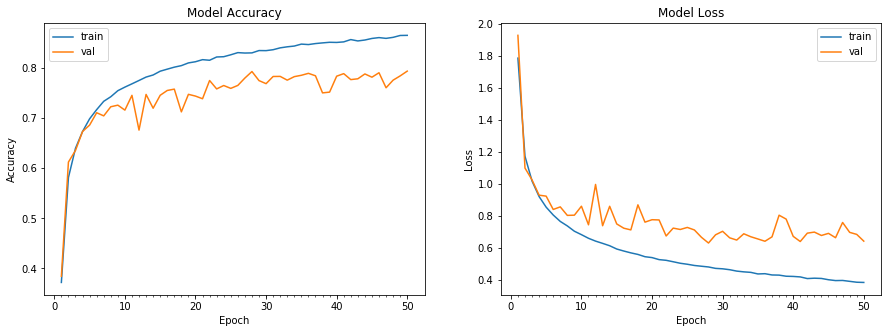

Accuracy on test data is: 79.37


In [23]:
datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

### Grouped Convolutions

In [0]:
from keras.models import Model
from keras.layers import Input
from keras.layers.merge import Concatenate

In [28]:
# Define the model
input_data = Input(shape=(32,32,3))

layer1 = SeparableConv2D(32, (3,3), use_bias=False, padding='same')(input_data) 
layer1 = BatchNormalization()(layer1)
layer1 = Activation('relu')(layer1)

layer2 = SeparableConv2D(32, (3,3), use_bias=False, padding='same')(layer1) 
layer2 = BatchNormalization()(layer2)
layer2 = Activation('relu')(layer2)

layer3 = MaxPooling2D(pool_size=(2,2))(layer2)

layer4_1 = SeparableConv2D(64, (3,3), use_bias=False, padding='same')(layer3)
layer4_1 = BatchNormalization()(layer4_1)
layer4_1 = Activation('relu')(layer4_1)

layer4_2 = SeparableConv2D(64, (5,5), use_bias=False, padding='same')(layer3)
layer4_2 = BatchNormalization()(layer4_2)
layer4_2 = Activation('relu')(layer4_2)

layer5_1 = SeparableConv2D(64, (3,3), use_bias=False, padding='same')(layer4_1)
layer5_1 = BatchNormalization()(layer5_1)
layer5_1 = Activation('relu')(layer5_1)

layer5_2 = SeparableConv2D(64, (5,5), use_bias=False, padding='same')(layer4_2)
layer5_2 = BatchNormalization()(layer5_2)
layer5_2 = Activation('relu')(layer5_2)

concat_layer = Concatenate()([layer5_1, layer5_2])

layer6 = SeparableConv2D(128, (3,3), use_bias=False, padding='same')(concat_layer)
layer6 = BatchNormalization()(layer6)
layer6 = Activation('relu')(layer6)

layer7 = SeparableConv2D(128, (3,3), use_bias=False, padding='same')(layer6)
layer7 = BatchNormalization()(layer7)
layer7 = Activation('relu')(layer7)

layer8 = MaxPooling2D(pool_size=(2,2))(layer7)

layer9 = SeparableConv2D(128, (8,8), use_bias=False)(layer8)

layer10 = Conv2D(10, (1,1), use_bias=False, padding='same')(layer9)

layer11 = Flatten()(layer10)

output = Activation('softmax')(layer11)

model = Model(input=[input_data], output=[output])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:49: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=[<tf.Tenso..., outputs=[<tf.Tenso...)`


In [29]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
separable_conv2d_11 (SeparableC (None, 32, 32, 32)   123         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_55 (BatchNo (None, 32, 32, 32)   128         separable_conv2d_11[0][0]        
__________________________________________________________________________________________________
activation_61 (Activation)      (None, 32, 32, 32)   0           batch_normalization_55[0][0]     
__________________________________________________________________________________________________
separable_

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`
  # Remove the CWD from sys.path while we load stuff.


Epoch 1/50
390/390 [==============================] - 16s 41ms/step - loss: 1.3162 - acc: 0.5248 - val_loss: 1.7039 - val_acc: 0.4680
Epoch 2/50
390/390 [==============================] - 12s 30ms/step - loss: 0.9048 - acc: 0.6816 - val_loss: 0.9796 - val_acc: 0.6612
Epoch 3/50
390/390 [==============================] - 12s 30ms/step - loss: 0.7603 - acc: 0.7340 - val_loss: 1.0135 - val_acc: 0.6618
Epoch 4/50
390/390 [==============================] - 12s 30ms/step - loss: 0.6686 - acc: 0.7655 - val_loss: 0.8236 - val_acc: 0.7180
Epoch 5/50
390/390 [==============================] - 12s 30ms/step - loss: 0.6030 - acc: 0.7902 - val_loss: 0.8233 - val_acc: 0.7208
Epoch 6/50
390/390 [==============================] - 12s 30ms/step - loss: 0.5483 - acc: 0.8073 - val_loss: 0.8355 - val_acc: 0.7250
Epoch 7/50
390/390 [==============================] - 12s 30ms/step - loss: 0.5023 - acc: 0.8241 - val_loss: 0.7817 - val_acc: 0.7417
Epoch 8/50
390/390 [==============================] - 12s 30ms

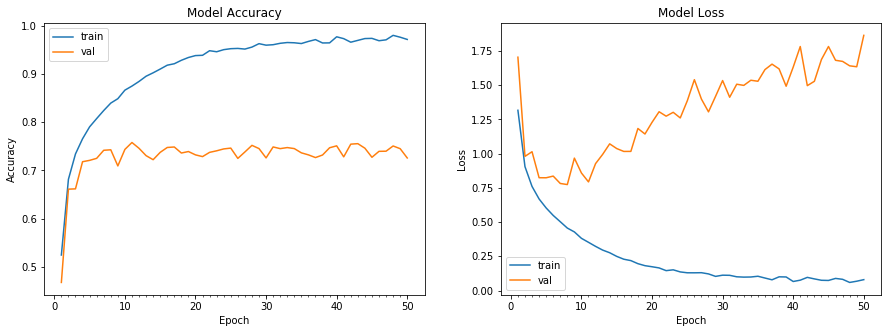

Accuracy on test data is: 72.58


In [30]:
datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

### Dilated Convolution

In [31]:
# Define the model
input_data = Input(shape=(32,32,3))

layer1 = SeparableConv2D(32, (3,3), use_bias=False, padding='same')(input_data) 
layer1 = BatchNormalization()(layer1)
layer1 = Activation('relu')(layer1)

layer2 = SeparableConv2D(32, (3,3), use_bias=False, padding='same')(layer1) 
layer2 = BatchNormalization()(layer2)
layer2 = Activation('relu')(layer2)

layer3 = MaxPooling2D(pool_size=(2,2))(layer2) 

layer4_1 = SeparableConv2D(64, (3,3), use_bias=False, padding='same')(layer3)
layer4_1 = BatchNormalization()(layer4_1)
layer4_1 = Activation('relu')(layer4_1)

layer4_2 = SeparableConv2D(64, (5,5), use_bias=False, padding='same', dilation_rate=(2,2))(layer3)
layer4_2 = BatchNormalization()(layer4_2)
layer4_2 = Activation('relu')(layer4_2)

layer5_1 = SeparableConv2D(64, (3,3), use_bias=False, padding='same')(layer4_1)
layer5_1 = BatchNormalization()(layer5_1)
layer5_1 = Activation('relu')(layer5_1)

layer5_2 = SeparableConv2D(64, (5,5), use_bias=False, padding='same', dilation_rate=(2,2))(layer4_2)
layer5_2 = BatchNormalization()(layer5_2)
layer5_2 = Activation('relu')(layer5_2)

concat_layer = Concatenate()([layer5_1, layer5_2])

layer6 = SeparableConv2D(128, (3,3), use_bias=False, padding='same')(concat_layer)
layer6 = BatchNormalization()(layer6)
layer6 = Activation('relu')(layer6)

layer7 = SeparableConv2D(128, (3,3), use_bias=False, padding='same')(layer6)
layer7 = BatchNormalization()(layer7)
layer7 = Activation('relu')(layer7)

layer8 = MaxPooling2D(pool_size=(2,2))(layer7)

layer9 = SeparableConv2D(128, (8,8), use_bias=False)(layer8)

layer10 = Conv2D(10, (1,1), use_bias=False, padding='same')(layer9)

layer11 = Flatten()(layer10)

output = Activation('softmax')(layer11)

model = Model(input=[input_data], output=[output])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:49: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=[<tf.Tenso..., outputs=[<tf.Tenso...)`


In [32]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
separable_conv2d_20 (SeparableC (None, 32, 32, 32)   123         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_63 (BatchNo (None, 32, 32, 32)   128         separable_conv2d_20[0][0]        
__________________________________________________________________________________________________
activation_70 (Activation)      (None, 32, 32, 32)   0           batch_normalization_63[0][0]     
__________________________________________________________________________________________________
separable_

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`
  # Remove the CWD from sys.path while we load stuff.


Epoch 1/50
390/390 [==============================] - 22s 56ms/step - loss: 1.3114 - acc: 0.5267 - val_loss: 1.2680 - val_acc: 0.5502
Epoch 2/50
390/390 [==============================] - 17s 42ms/step - loss: 0.9350 - acc: 0.6701 - val_loss: 0.9826 - val_acc: 0.6508
Epoch 3/50
390/390 [==============================] - 17s 43ms/step - loss: 0.7945 - acc: 0.7182 - val_loss: 1.1226 - val_acc: 0.6131
Epoch 4/50
390/390 [==============================] - 17s 42ms/step - loss: 0.6992 - acc: 0.7542 - val_loss: 0.8536 - val_acc: 0.7112
Epoch 5/50
390/390 [==============================] - 17s 43ms/step - loss: 0.6287 - acc: 0.7781 - val_loss: 0.8312 - val_acc: 0.7223
Epoch 6/50
390/390 [==============================] - 16s 42ms/step - loss: 0.5718 - acc: 0.7977 - val_loss: 0.8096 - val_acc: 0.7281
Epoch 7/50
390/390 [==============================] - 16s 42ms/step - loss: 0.5117 - acc: 0.8187 - val_loss: 0.8930 - val_acc: 0.7077
Epoch 8/50
390/390 [==============================] - 17s 42ms

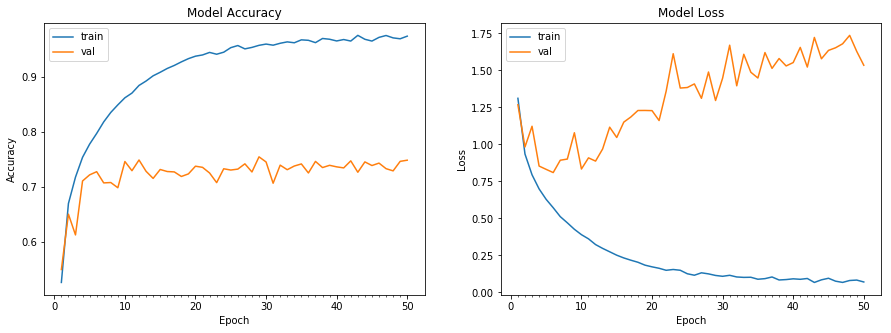

Accuracy on test data is: 74.90


In [33]:
datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))